# Week 1: Our Approach to Modelling Data
## [Peter Hurley](http://www.sussex.ac.uk/profiles/188689) and [Phil Rooney](http://www.sussex.ac.uk/profiles/252374) 
### Astronomy Centre, Maths and Physical Sciences

### People from different fields will have different levels of:
* expertise
* terminology
* philosophy 

### to Machine Learning and Data Analysis. 



Since this our first proper meeting, it seemed appropriate to kick off with a more general talk to introduce some topics, and how we think they fit in with the Machine learning community.

## As Astronomers, we don't get to repeat expermients..  
   ### We can only observe! 
   ### Observing is expensive!  

<img src="https://science.nrao.edu/facilities/alma/images/alma_ant315.png" />

There is only one Universe, and we can only observe the sky, all be it at different wavelengths!
Data is also expensive. Sending telescopes to space isn't cheap, neither is running ground based facilities like ALMA or JCMT.
so we use a variety of statistical techniques to squueze as much information from the data as possible

## Bayesian Probability


P( A | B ) = ( P( B | A ) * P(A))/P(B)

posterior = (likelihood\*prior)/marginal_likelihood

### Medical Example

Blood test detects vampirism 95% of the time. It makes mistakes 1% of the time

Suppose vampires Make up 0.1% of the population

What is the probability that a positive case is a vampire?

P(vampire | positive) = (P( positive | vampire )\*P(vampire))/P(positive)
[ Where P(positive) = P( positive | vampire )\*P(vampire) + P(vampire | positive)\*P(positive) ]

P(vampire | positive) = 8.7 %

### Saturn Example


<img src="https://astronomy.sussex.ac.uk/~pr83/saturn.png" />

### Bayesian Inference

## Probabilistic Programming
> ["Define probability models and then “solve” these models automatically"](http://radar.oreilly.com/2013/04/probabilistic-programming.html) 

### Analogy: Computer programming! 

> High level languages frees developer from complexities of processor and memory architecture, e.g. Python, Matlab 

-----
> Probabilitic Programming languages free developers from complexities of high-performance probabilistic inference (e.g. MCMC, EM, Variational Bayes)




<img src="http://s.radar.oreilly.com/files/2013/04/PP-Figure.002.png" />

In a simulation, we create a model that represents some sort of physical system. For example, in Astronomy, we have Nbody simulations of the Universe or individual galaxies. Start with some number of particles, each with some mass, define some rules for how they interact with each other, run simulation, get out a snapshot of a galaxy.. 

### Simulations only run one way.. 
from causes to hypothesized effects.. other example might be climate model

### Inference goes the other way.. 
we learn what the plausible causes are that could have given us our observed data



## Why is this Important?

* Allows us to separate out *modelling* and *inference*
* Can create more flexible, and complex models
* Can deal with more complex data
* No longer have to rely on *Blackbox* like approaches 


### Neuro example of black box problems

### Probabilisitic Programming Languages:
Some examples..
1. [PyMC](https://github.com/pymc-devs/pymc) python module that implements a suite of MCMC algorithms as python classes, is extremely flexible and applicable to a large suite of problems. PyMC includes methods for summarizing output, plotting, goodness-of-fit and convergence diagnostics.
2. [Infer.NET](http://research.microsoft.com/en-us/um/cambridge/projects/infernet/) is a software library developed by Microsoft for expressing graphical models and implementing Bayesian inference using a variety of algorithms.
3. [Venture](http://probcomp.csail.mit.edu/venture/) is an interactive, Turing-complete, higher-order probabilistic programming platform that aims to be sufficiently expressive, extensible and efficient for general-purpose use. Its virtual machine supports multiple scalable, reprogrammable inference strategies, plus two front-end languages: VenChurch and VentureScript.
4. [Stan](http://mc-stan.org/) exposes a language for defining probability density functions for probabilistic models. Stan includes a compiler, which produces C++ code that performs Bayesian inference via a method similar to Hamiltonian Monte Carlo sampling.

## Building probabilitic models

The key to building probabilisitic models is to model dependencies as structure!


>One morning Tracey leaves her house and realises that her grass is wet. Is it due to overnight rain or did she forget to turn off the sprinkler last night? Next she notices that the grass of her neighbour, Jack, is also wet. This explains away to some extent the possibility that her sprinkler was left on, and she concludes therefore that it has probably been raining.

- $R \in {0, 1}$, $R = 1$ means that it has been raining, and 0 otherwise
- $S \in {0, 1}$, $S = 1$ means that Tracey has forgotten to turn off the sprinkler, 0 otherwise
- $J \in {0, 1}$, $J = 1$ means that Jack’s grass is wet, and 0 otherwise
- $T \in {0, 1}$, $T = 1$ means that Tracey’s Grass is wet, and 0 otherwise


We want to model $p(T,J,R,S)$, i.e. Tracy's world. 
Naïvely that requires $2^4=16$ states e.g. $p(T = 1,J = 0,R = 0,S = 1) = 0.057$ etc.

### However, we can use our prior knowledge to help constrain the model

* $p(T |J, R, S) = p(T |R, S)$ 
    - The probability that Tracey's grass is wet only depends on whether it has been raining or the sprinkler


* $p(J|R, S) = p(J|R)$
    - The probability that Jack's grass is wet only depends on whether it has been raining

* $p(R|S) = p(R)$ 
    - The probabiity it has been raining does not depend on the sprinkler

### Combining all of this conditional independence information...
 
* $p(T,J,R,S) = p(T|R,S)p(J|R)p(R)p(S)$

There is a far more intuitive way to visualise these conditional dependecies using..
## Probabilistic Graphical Models

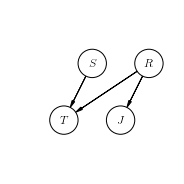

In [7]:
from matplotlib import rc
%matplotlib inline
rc("font", family="serif", size=12)
rc("text", usetex=True)
import daft

#Set up plot space
pgm = daft.PGM([3, 3], origin=[0, 0])

#Add nodes
pgm.add_node(daft.Node("T", r"$T$", 1,1))
pgm.add_node(daft.Node("J", r"$J$", 2,1))
pgm.add_node(daft.Node("R", r"$R$", 2.5,2))
pgm.add_node(daft.Node("S", r"$S$", 1.5,2))

pgm.add_edge("R", "T")
pgm.add_edge("R", "J")
pgm.add_edge("S", "T")
pgm.render()


### No single agreed notation but:

Always: 

- Nodes represent variables and graph structure represent dependencies

Almost Always: 

- Plates indicate replication

Optional Distinctions: 

- Continuous vs Discrete
- Observed vs Hidden 
- Stocastic vs Deterministic
- Observed Variables vs Known Property of Experimental Design

### Binary process

# Examples
-----------------

## Single Variable

<img src="https://astronomy.sussex.ac.uk/~pr83/onevar.png" />



In [4]:

import pystan
import numpy as np
import seaborn as sns
from astropy.table import Table
%matplotlib inline


one_var_model = """

// Inferring a Rate
data { 
  int<lower=1> n; 
  int<lower=0> k;
} 
parameters {
  real<lower=0,upper=1> theta;
} 
model {
  // Prior Distribution for Rate Theta
  theta ~ beta(1, 1);
  
  // Observed Counts
  k ~ binomial(n, theta);
}
"""

k = 9
n = 20

#k = 407
#n = 800

input_data = {'k':k, 'n':n}

fit_onevar = pystan.stan(model_code=one_var_model, data=input_data, iter=10000, chains=4)


fit_onevar



/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Inference for Stan model: anon_model_08f3dae424b59a035b3b9af363c1083c.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.45  1.6e-3    0.1   0.26   0.38   0.45   0.53   0.66 4229.0    1.0
lp__  -15.66    0.01   0.71 -17.69 -15.81 -15.39 -15.21 -15.16 4438.0    1.0

Samples were drawn using NUTS(diag_e) at Mon Jul 18 11:04:16 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

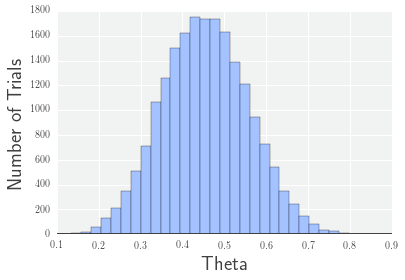

In [7]:

from __future__ import unicode_literals

import matplotlib as mpl
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True

import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

samples=fit_onevar.extract(permuted=False, inc_warmup=False)
samples=samples[:,:,0].reshape(samples.shape[0]*samples.shape[1])

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.hist(samples, 30, color='#A3C2FF')
ax1.set_axis_bgcolor('#F1F2F2')
ax1.tick_params(axis="y", labelcolor="b")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', colors='#414042', labelcolor='#414042')
ax1.tick_params(axis='y', colors='#414042',labelcolor='#414042')
ax1.yaxis.label.set_color('#414042')
ax1.xaxis.label.set_color('#414042')
# Only show ticks on the left and bottom spines
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.axhline(color='#414042', linewidth=2)

plt.ylabel('Number of Bins)', color='#414042')
ax1.spines['top'].set_color('red')

plt.ylabel('Number of Trials', fontsize=20)
plt.xlabel('Theta', fontsize=20)

plt.show()


## Schools 

## Pearson Product Moment Correlation ##

<img src="https://astronomy.sussex.ac.uk/~pr83/pearson_corr.png" />



In [38]:
pearson_model = """
// Pearson Correlation
data { 
  int<lower=0> n;
  vector[2] x[n];
}
parameters {
  vector[2] mu;
  vector<lower=0>[2] lambda;
  real<lower=-1,upper=1> r;
} 
transformed parameters {
  vector<lower=0>[2] sigma;
  cov_matrix[2] T;
  // Reparameterization
  sigma[1] <- inv_sqrt(lambda[1]);
  sigma[2] <- inv_sqrt(lambda[2]);
  T[1,1] <- square(sigma[1]);
  T[1,2] <- r * sigma[1] * sigma[2];
  T[2,1] <- r * sigma[1] * sigma[2];
  T[2,2] <- square(sigma[2]);
}
model {
  // Priors
  mu ~ normal(0, inv_sqrt(.001));
  lambda ~ gamma(.001, .001);
  
  // Data
  x ~ multi_normal(mu, T);
}
"""

#pearson_data = np.matrix([[.8,102], [1.0,98], [.5,100], [.9,105], [.7,103], [.4,110], [1.2,99], [1.4,87], [.6,113], [1.1,89], [1.3,93]])
pearson_data = np.matrix([[.8,102,],[1.0,98,],[.5,100,],[.9,105,],[.7,103,],[.4,110,],[1.2,99,],[1.4,87,],[.6,113,],[1.1,89,],[1.3,93,],[.8,102,],[1.0,98,],[.5,100,],[.9,105,],[.7,103,],[.4,110,],[1.2,99,],[1.4,87,],[.6,113,],[1.1,89,],[1.3,93]])
#n = 11
n = 22
parameters ={"r", "mu", "sigma"}

data = {'x':pearson_data, 'n':n}

samples_pearson = pystan.stan(model_code=pearson_model, data=data, iter=10000, chains=4)

samples_pearson

Inference for Stan model: anon_model_cbdffd142e6b5f7643dd9a16a8322d7b.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]       0.91  1.1e-3   0.07   0.77   0.86   0.91   0.96   1.05 4052.0    1.0
mu[1]      99.64    0.03   1.76   96.1  98.51  99.67 100.81 103.06 4042.0    1.0
lambda[0]   9.87    0.05   2.98   4.94   7.73    9.6  11.69   16.5 4237.0    1.0
lambda[1]   0.02  7.6e-5 5.0e-3 8.2e-3   0.01   0.02   0.02   0.03 4315.0    1.0
r          -0.76  1.5e-3    0.1   -0.9  -0.83  -0.78  -0.71  -0.53 3949.0    1.0
sigma[0]    0.33  8.4e-4   0.05   0.25   0.29   0.32   0.36   0.45 3889.0    1.0
sigma[1]    8.02    0.02   1.28    6.0   7.12   7.86   8.74  11.02 3946.0    1.0
T[0,0]      0.11  6.0e-4   0.04   0.06   0.09    0.1   0.13    0.2 3799.0    1.0
T[1,0]     -2.08    0.01    0.8  -4.07  -2.47  -1.93  -1.52  -0.98 3388.0    1.0

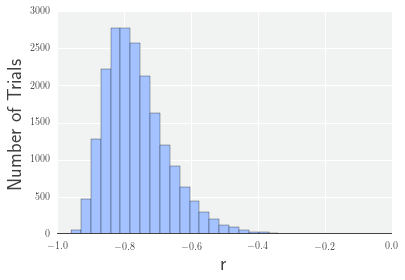

In [9]:

samples=samples_pearson.extract(permuted=False, inc_warmup=False)
samples=samples[:,:,4].reshape(samples.shape[0]*samples.shape[1])

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.hist(samples, 30, color='#A3C2FF')
ax1.set_axis_bgcolor('#F1F2F2')
ax1.tick_params(axis="y", labelcolor="b")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', colors='#414042', labelcolor='#414042')
ax1.tick_params(axis='y', colors='#414042',labelcolor='#414042')
ax1.yaxis.label.set_color('#414042')
ax1.xaxis.label.set_color('#414042')
# Only show ticks on the left and bottom spines
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.axhline(color='#414042', linewidth=2)

plt.ylabel('Number of Bins)', color='#414042')
ax1.spines['top'].set_color('red')

plt.ylabel('Number of Trials', fontsize=20)
plt.xlabel('r', fontsize=20)

plt.show()

$\kappa$ Values

<img src="https://astronomy.sussex.ac.uk/~pr83/kappa.png" />



In [26]:
kappa_model ="""
// Kappa Coefficient of Agreement
data { 
  int<lower=0> y[4];
}
parameters {
  // Underlying Rates
  // Rate Objective Method Decides 'one'
  real<lower=0,upper=1> alpha;
  // Rate Surrogate Method Decides 'one' When Objective Method Decides 'one'
  real<lower=0,upper=1> beta;
  // Rate Surrogate Method Decides 'zero' When Objective Method Decides 'zero'
  real<lower=0,upper=1> gamma;
} 
transformed parameters {
  simplex[4] pi;
  real xi;
  real psi;
  real kappa;
  // Probabilities For Each Count
  pi[1] <- alpha * beta;
  pi[2] <- alpha * (1 - beta);
  pi[3] <- (1 - alpha) * (1 - gamma);
  pi[4] <- (1 - alpha) * gamma;
    
  // Derived Measures   
  // Rate Surrogate Method Agrees With the Objective Method
  xi <- alpha * beta + (1 - alpha) * gamma ;
  // Rate of Chance Agreement
  psi <- (pi[1] + pi[2]) * (pi[1] + pi[3]) + (pi[2] + pi[4]) * (pi[3] + pi[4]);  
  // Chance-Corrected Agreement
  kappa <- (xi - psi) / (1 - psi);
}
model {
  alpha ~ beta(1, 1);  // could be removed
  beta ~ beta(1, 1);  // could be removed
  gamma ~ beta(1, 1);  // could be removed
  // Count Data     
  y ~ multinomial(pi);
}
"""
# CHOOSE a data set:
# Influenza 
#y = [14., 4., 5., 210.]
# Rare Disease
y = [0, 0, 13, 157]

data = {'y':y}

samples_kappa = pystan.stan(model_code=kappa_model, data=data, iter=10000, chains=4)

samples_kappa

Inference for Stan model: anon_model_730a353f049501aac63c4de3fe0e0a30.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha 5.8e-3  7.7e-5 5.7e-3 1.5e-4 1.7e-3 4.1e-3 8.0e-3   0.02 5576.0    1.0
beta    0.49  4.0e-3   0.29   0.02   0.24   0.49   0.75   0.98 5390.0    1.0
gamma   0.92  3.0e-4   0.02   0.87   0.91   0.92   0.93   0.95 5026.0    1.0
pi[0] 2.9e-3  5.2e-5 3.8e-3 2.3e-5 4.9e-4 1.6e-3 3.8e-3   0.01 5305.0    1.0
pi[1] 2.9e-3  5.1e-5 3.7e-3 2.6e-5 5.2e-4 1.6e-3 3.9e-3   0.01 5212.0    1.0
pi[2]   0.08  2.9e-4   0.02   0.04   0.07   0.08   0.09   0.13 5037.0    1.0
pi[3]   0.91  3.0e-4   0.02   0.87    0.9   0.91   0.93   0.95 5018.0    1.0
xi      0.92  3.0e-4   0.02   0.87    0.9   0.92   0.93   0.95 5015.0    1.0
psi     0.91  3.1e-4   0.02   0.86    0.9   0.91   0.93   0.95 5041.0    1.0
kappa   0.05  9.2e-4   0.07-6.2e-3 6.8e

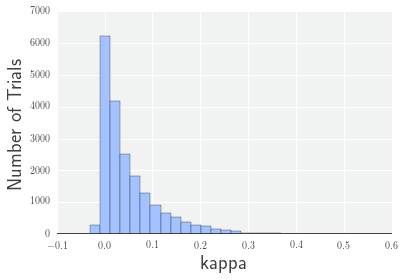

In [27]:
samples=samples_kappa.extract(permuted=False, inc_warmup=False)
samples=samples[:,:,9].reshape(samples.shape[0]*samples.shape[1])

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.hist(samples, 30, color='#A3C2FF')
ax1.set_axis_bgcolor('#F1F2F2')
ax1.tick_params(axis="y", labelcolor="b")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', colors='#414042', labelcolor='#414042')
ax1.tick_params(axis='y', colors='#414042',labelcolor='#414042')
ax1.yaxis.label.set_color('#414042')
ax1.xaxis.label.set_color('#414042')
# Only show ticks on the left and bottom spines
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.axhline(color='#414042', linewidth=2)

plt.ylabel('Number of Bins)', color='#414042')
ax1.spines['top'].set_color('red')

plt.ylabel('Number of Trials', fontsize=20)
plt.xlabel('kappa', fontsize=20)

plt.show()

In [28]:
y = [0., 0., 13., 157.]
n = sum(y)
p0 = (y[0]+y[3])/n
pe = (((y[0]+y[1]) * (y[0]+y[2])) + ((y[1]+y[3]) * (y[2]+y[3]))) / (n*n)
kappa_Cohen = (p0-pe) / (1-pe) 
kappa_Cohen

0.0

## Regression

#### Correlated Errors

## Gaussian Mixtures Modelling

Gaussian Mixtures modelling is an unsupervised learning method to model continuous data as a group of Gaussians
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Nonbayesian-gaussian-mixture.svg/500px-Nonbayesian-gaussian-mixture.svg.png" />

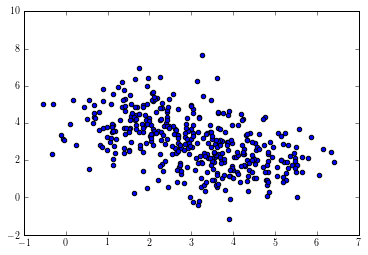

In [16]:
import numpy as np
import pylab as plt 
%matplotlib inline

G1=np.random.multivariate_normal([2,4],[[1,0],[0,1]],200)
G2=np.random.multivariate_normal([4,2],[[1,0],[0,1]],200)
data=np.concatenate((G1,G2))
plt.scatter(data[:,0],data[:,1])

In [59]:
model="""
data {

  int<lower=1> D;
  int<lower=1> K;
  int<lower=1> N;
  vector[D] y[N]; //observations
}

parameters {
  simplex[K] theta;
  vector[D] mu[K];
  real<lower=0,upper=10> sigma[K];  // scales of mixture components
}

model {
  real ps[K];
  for (k in 1:K) {

    mu[k] ~ normal(0,10);
  }

  for (n in 1:N){
  for(k in 1:K){

    ps[k] <- log(theta[k])
    + normal_log(y[n],mu[k],sigma[k]);
}

    increment_log_prob(log_sum_exp(ps));
  }
}
"""

In [60]:
import pystan
sm = pystan.StanModel(model_code=model)


In [65]:
GMMdata={
    'D':2,
    'K':2,
    'N':400,
    'y':data
}

In [68]:
fit = sm.sampling(data=GMMdata,iter=1000, chains=1)

In [69]:
print fit

Inference for Stan model: anon_model_d7a05c9f98b0bd755c75155d804c7f5a.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta[0]   0.48  4.1e-3   0.04   0.39   0.45   0.48   0.51   0.57  116.0    1.0
theta[1]   0.52  4.1e-3   0.04   0.43   0.49   0.52   0.55   0.61  116.0    1.0
mu[0,0]    2.01  9.8e-3   0.11    1.8   1.94   2.01   2.09   2.22  126.0    1.0
mu[1,0]    3.96  8.6e-3    0.1   3.76    3.9   3.96   4.02   4.16  121.0    1.0
mu[0,1]    4.01    0.01   0.11   3.78   3.94    4.0   4.09   4.24  123.0    1.0
mu[1,1]    2.02  8.6e-3    0.1   1.83   1.96   2.02   2.09    2.2  124.0    1.0
sigma[0]   1.05  4.9e-3   0.05   0.96   1.02   1.05   1.09   1.16  121.0    1.0
sigma[1]   1.01  4.3e-3   0.05   0.92   0.97   1.01   1.04    1.1  118.0    1.0
lp__      -1349    0.17   1.85  -1354  -1350  -1349  -1348  -1346  113.0    1.0

Samples were 

In [70]:
samples=fit.extract(permuted=False, inc_warmup=False)

[0.5458490399648471, 1.091698079929167, 4.912641359683624, 18.558867358803749]


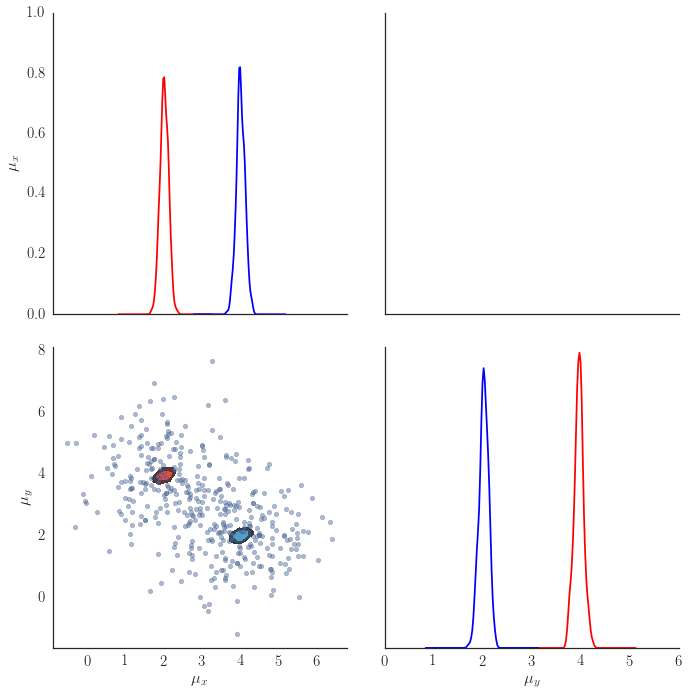

In [88]:
import seaborn as sns
sns.set(color_codes=True,font_scale=1.5)
import pandas as pd
sns.set_style("white")



s1=2
s2=3
import scipy
# Make a 2d normed histogram
H,xedges,yedges=np.histogram2d(samples[:,:,[s1]].reshape(samples.shape[0]*samples.shape[1]),samples[:,:,[s2]].reshape(samples.shape[0]*samples.shape[1]),bins=10,normed=True)

norm=H.sum() # Find the norm of the sum
# Set contour levels
contour1=0.99
contour2=0.95
contour3=0.68

# Set target levels as percentage of norm
target1 = norm*contour1
target2 = norm*contour2
target3 = norm*contour3

# Take histogram bin membership as proportional to Likelihood
# This is true when data comes from a Markovian process
def objective(limit, target):
    w = np.where(H>limit)
    count = H[w]
    return count.sum() - target

# Find levels by summing histogram to objective
level1= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target1,))
level2= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target2,))
level3= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target3,))

# For nice contour shading with seaborn, define top level
level4=H.max()
levels=[level1,level2,level3,level4]

print levels

labels=[r'$\mu_x$',r'$\mu_y$']
df = pd.DataFrame(samples[:,:,[s1,s2]].reshape(samples.shape[0]*samples.shape[1],2),columns=labels)
g = sns.PairGrid(df,size=5)
g.map_diag(sns.kdeplot,c='Red')
g.map_lower(sns.kdeplot, cmap="Reds_d",alpha=1,n_levels=levels,normed=True,shade=True,zorder=1)

#g.set(ylim=(-1,3))
#g.set(xlim=(-1,3))
s1=4
s2=5

# Make a 2d normed histogram
H,xedges,yedges=np.histogram2d(samples[:,:,[s1]].reshape(samples.shape[0]*samples.shape[1]),samples[:,:,[s2]].reshape(samples.shape[0]*samples.shape[1]),bins=10,normed=True)

norm=H.sum() # Find the norm of the sum
# Set contour levels
contour1=0.99
contour2=0.95
contour3=0.68

# Set target levels as percentage of norm
target1 = norm*contour1
target2 = norm*contour2
target3 = norm*contour3

# Take histogram bin membership as proportional to Likelihood
# This is true when data comes from a Markovian process
def objective(limit, target):
    w = np.where(H>limit)
    count = H[w]
    return count.sum() - target

# Find levels by summing histogram to objective
level1= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target1,))
level2= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target2,))
level3= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target3,))

# For nice contour shading with seaborn, define top level
level4=H.max()
levels=[level1,level2,level3,level4]

g.data=pd.DataFrame(samples[:,:,[s1,s2]].reshape(samples.shape[0]*samples.shape[1],2),columns=labels)
g.map_diag(sns.kdeplot,c='Blue')
g.map_lower(sns.kdeplot, cmap="Blues_d",alpha=1,n_levels=levels,normed=True,shade=True,zorder=1)
g.axes[1,0].scatter(data[:,0],data[:,1],alpha=0.5)


